In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.functions import *
from core.gradient import *
from core.layers import *
from core.network.twolayernet import BackPropagationNet
from core.optimizer import *

(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

colors = [
    "#ef4444",  # 0
    "#f97316",  # 1
    "#f59e0b",  # 2
    "#eab308",  # 3
    "#84cc16",  # 4
    "#22c55e",  # 5
    "#10b981",  # 6
    "#14b8a6",  # 7
    "#06b6d4",  # 8
    "#0ea5e9",  # 9
    "#3b82f6",  # 10
    "#6366f1",  # 11
    "#8b5cf6",  # 12
    "#a855f7",  # 13
    "#d946ef",  # 14
    "#ec4899",  # 15
    "#f43f5e",  # 16
    "#f3f4f6",  # 17
    "#d1d5db",  # 18
    "#6b7280",  # 19
    "#374151",  # 20
    "#111827",  # 21
]

def rgb_to_float(rgb):
    r = int(rgb[1:3], 16) / 255.0
    g = int(rgb[3:5], 16) / 255.0
    b = int(rgb[5:7], 16) / 255.0

    return (r, g, b)


color_pal = list(map(rgb_to_float, colors))

## Optimizer Comparison

### Naive Comparison

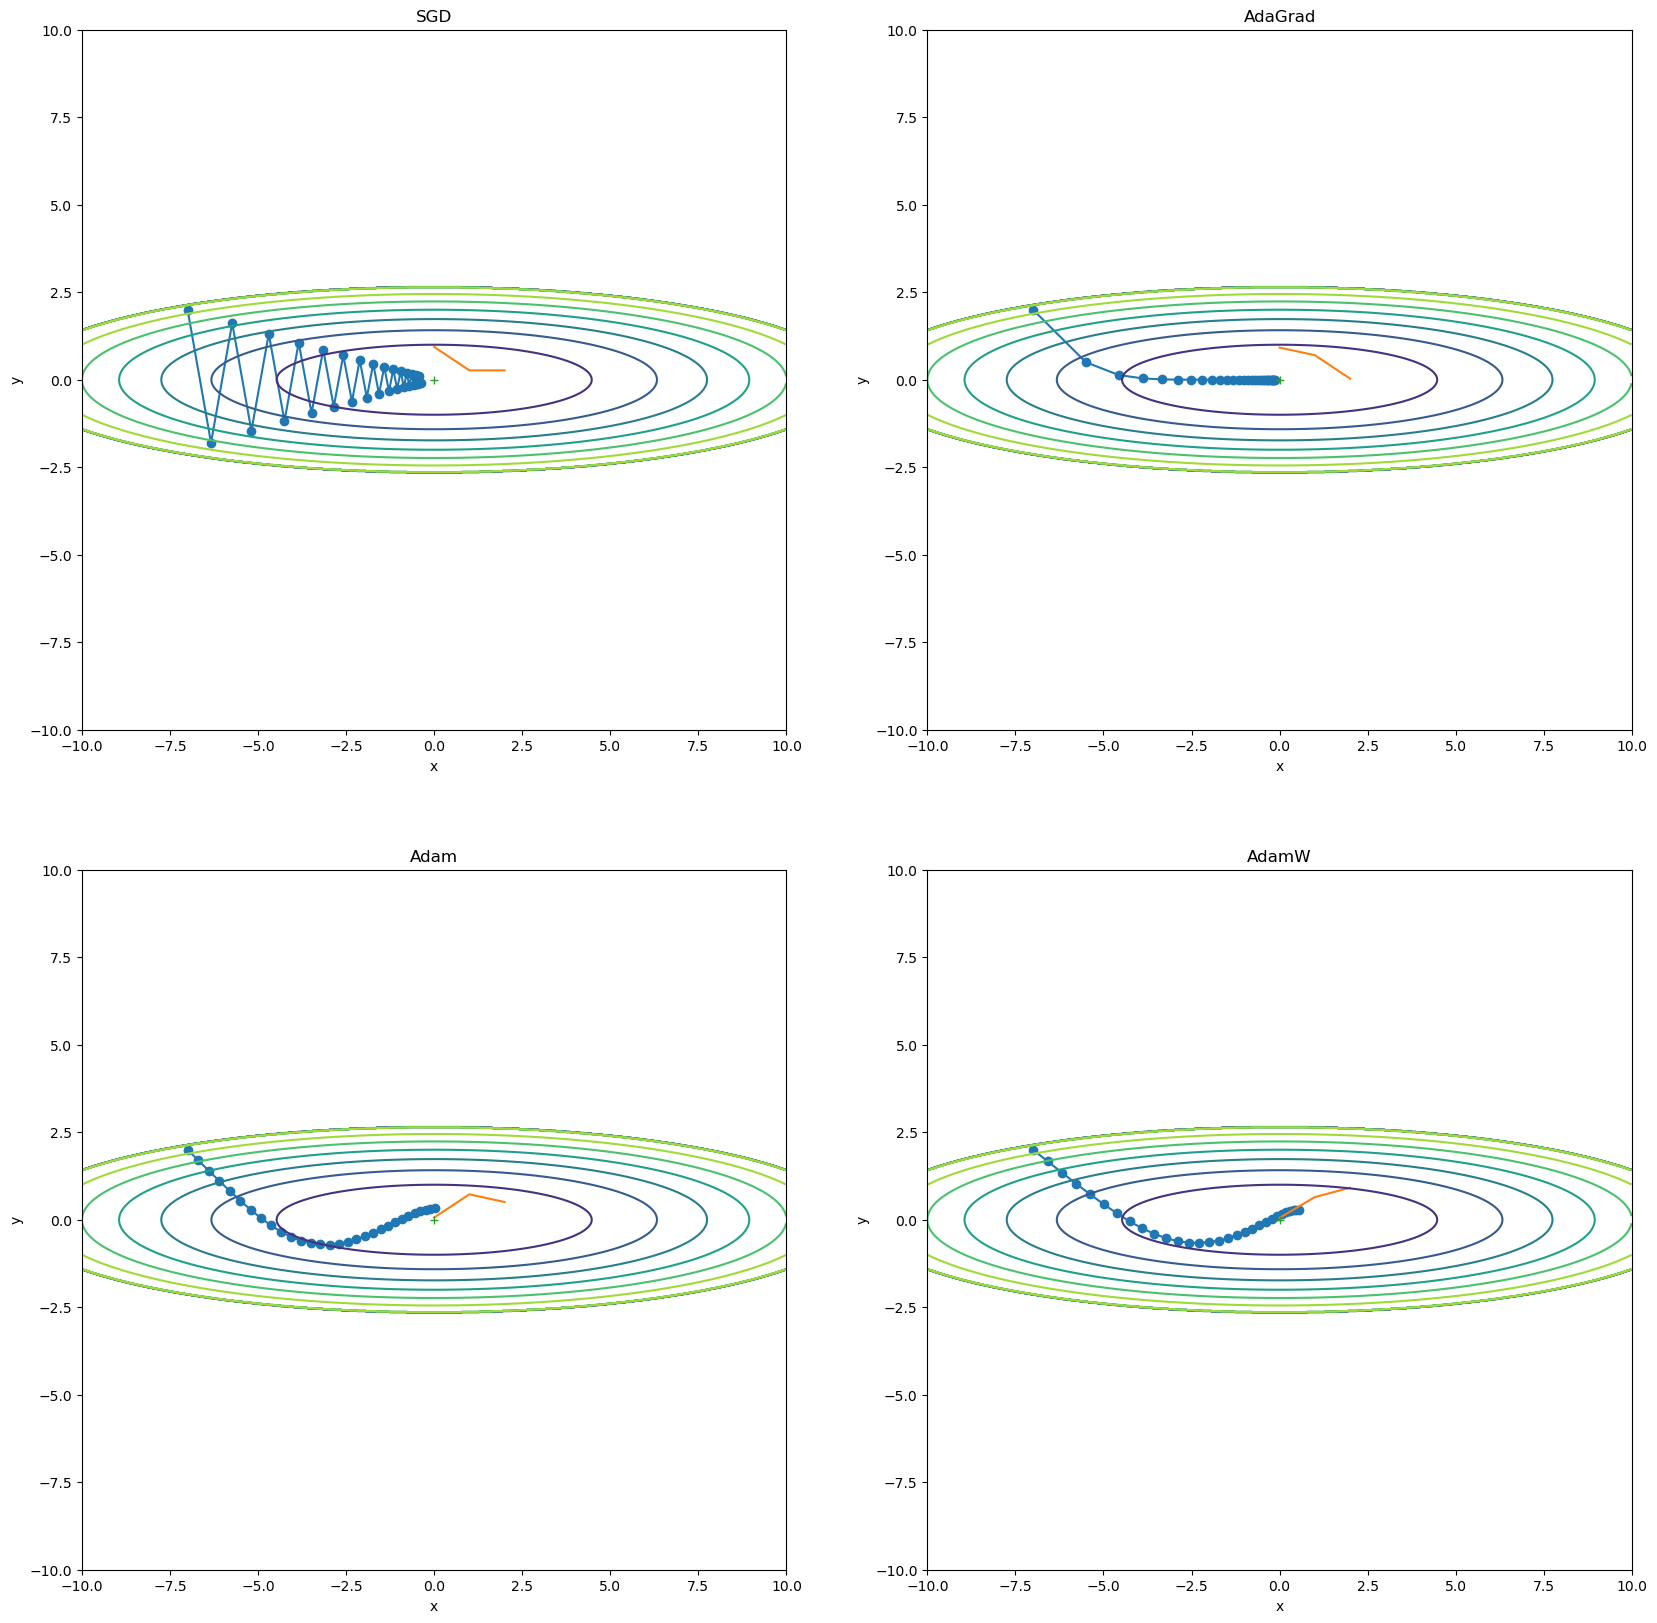

In [3]:
from collections import OrderedDict

def f(x, y):
    return x ** 2 / 20.0 + y ** 2

def df(x, y):
    return x / 10.0, 2 * y

init_pos = (-7.0, 2.0)
params = {}
params["x"], params["y"] = init_pos[0], init_pos[1]
grads = {}
grads["x"], grads["y"] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(0.95)
# optimizers["Momentum"] = Momentum(0.1)
optimizers["AdaGrad"] = AdaGrad(1.5)
optimizers["Adam"] = Adam(0.3)
optimizers["AdamW"] = AdamW(900, 1, 1, 0.3)

index = 1
for k, optimizer in optimizers.items():
    x_history = []
    y_history = []
    params["x"], params["y"] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params["x"])
        y_history.append(params["y"])

        grads["x"], grads["y"] = df(params["x"], params["y"])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    mask = Z > 7
    Z[mask] = 0
    
    plt.subplot(2, 2, index)
    plt.plot(x_history, y_history, "o-", color_pal[(index-1)*3])
    plt.contour(X, Y, Z)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.plot(0, 0, "+")
    plt.title(k)
    plt.xlabel("x")
    plt.ylabel("y")
    index += 1

fig = plt.gcf()
fig.set_size_inches(20, 20, forward=True)
plt.show()